# Proyek Analisis Data: Brazilian E-Commerce Public Dataset
- **Nama:** Fadhila Syahda Faustina Austrin
- **Email:** fadhilasyahda27@gmail.com
- **ID Dicoding:** fdhilasfa

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kota mana yang memiliki jumlah pelanggan terbanyak?
- Pertanyaan 2 : Berapa rata rata skala skor ulasan dari produk yang dijual?
- Pertanyaan 3 : Berapa rata-rata waktu pengiriman?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
import numpy as np

## Data Wrangling

### Gathering Data

Load data customer

In [4]:
# URL for the shared file
url = 'https://drive.google.com/file/d/1bBZ7icrWsSAP2DhJp3JGagbd9Zd3945I/view?usp=sharing'
# Extract the file id from the url
file_id = url.split('/')[-2]
# Create the download url
dwn_url = 'https://drive.google.com/uc?id=' + file_id
# Download the file
gdown.download(dwn_url, 'customer.csv', quiet=False)
# Read the file
customer_df = pd.read_csv('customer.csv')
customer_df


Downloading...
From: https://drive.google.com/uc?id=1bBZ7icrWsSAP2DhJp3JGagbd9Zd3945I
To: /content/customer.csv
100%|██████████| 9.03M/9.03M [00:00<00:00, 166MB/s]


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Load data review product

In [5]:
# URL for the shared file
url = 'https://drive.google.com/file/d/1cfC2n4ELCGdqtTq8Wcr1ZBzF4naUHi9F/view?usp=sharing'
# Extract the file id from the url
file_id = url.split('/')[-2]
# Create the download url
dwn_url = 'https://drive.google.com/uc?id=' + file_id
# Download the file
gdown.download(dwn_url, 'review.csv', quiet=False)
# Read the file
review_df = pd.read_csv('review.csv')
review_df

Downloading...
From: https://drive.google.com/uc?id=1cfC2n4ELCGdqtTq8Wcr1ZBzF4naUHi9F
To: /content/review.csv
100%|██████████| 14.5M/14.5M [00:00<00:00, 127MB/s]


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Load data order

In [6]:
# URL for the shared file
url = 'https://drive.google.com/file/d/1J73OxNI7VmJZ_6hSHjiTVOdx0Wi_9AxX/view?usp=sharing'
# Extract the file id from the url
file_id = url.split('/')[-2]
# Create the download url
dwn_url = 'https://drive.google.com/uc?id=' + file_id
# Download the file
gdown.download(dwn_url, 'order.csv', quiet=False)
# Read the file
order_df = pd.read_csv('order.csv')
order_df

Downloading...
From: https://drive.google.com/uc?id=1J73OxNI7VmJZ_6hSHjiTVOdx0Wi_9AxX
To: /content/order.csv
100%|██████████| 17.7M/17.7M [00:00<00:00, 141MB/s]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


### Assessing Data

In [7]:
# Memeriksa data dari customer_df
customer_df.info()
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


In [8]:
# Memeriksa data dari review_df
review_df.info()
print("Jumlah duplikasi: ", review_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi:  0


In [9]:
# Memeriksa data dari order_df
order_df.info()
print("Jumlah duplikasi: ", order_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi:  0


### Cleaning Data

Data customer





In [10]:
# Melakukan cleaning data customer dengan melihat duplikasi data
customer_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Cleaning data customer apabila terdapat data kosong (NaN)
customer_df[customer_df.customer_city.isna()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [12]:
# Melihat value count dari customer
customer_df.customer_city.value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

In [13]:
# Melihat apakah terdapat nilai null
customer_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data review

In [14]:
# Melakukan cleaning data review
review_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", review_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
# Cleaning data review apabila terdapat data kosong (NaN)
review_df[review_df.review_score.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [16]:
# Melihat value count dari review
review_df.review_score.value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [17]:
# Melihat data yang bernilai null di data review
review_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Data Order

In [18]:
# Melakukan cleaning data order
order_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", order_df.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
# Cleaning data order apabila terdapat data kosong (NaN)
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [20]:
# Melakukan drop data yang memiliki nilai kosong
order_df.dropna(axis=0, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

Ekspolari customer_df

In [21]:
customer_df.describe(include="all")

## Akan terlihat bahwa "Sao Paulo" menjadi kota customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [22]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

## Akan terlihat urutan city asal customer

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

Eksplorasi review_df

In [23]:
review_df.describe(include="all")

## Akan terlihat rata rata dari review_score

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Eksplorasi order_df

In [34]:
# Ubah kolom ke datetime
order_df["order_delivered_carrier_date"] = pd.to_datetime(order_df["order_delivered_carrier_date"])
order_df["order_delivered_customer_date"] = pd.to_datetime(order_df["order_delivered_customer_date"])

# Hitung selisih waktu dalam detik
delivery_time = order_df["order_delivered_carrier_date"] - order_df["order_delivered_customer_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())

# Ubah detik ke hari dan bulatkan ke bawah
delivery_time = (delivery_time/86400).apply(np.floor)

# Tambahkan kolom baru ke dataframe
order_df["delivery_time"] = delivery_time
order_df

## Akan terlihat jumlah hari delivery time barang

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,-7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,-13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,-10.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,-10.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,-2.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,-8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,-21.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,-24.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,-14.0


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-25-dc59e21d1d54>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Customers', y='City', data=df_visual.head(10), palette='coolwarm')


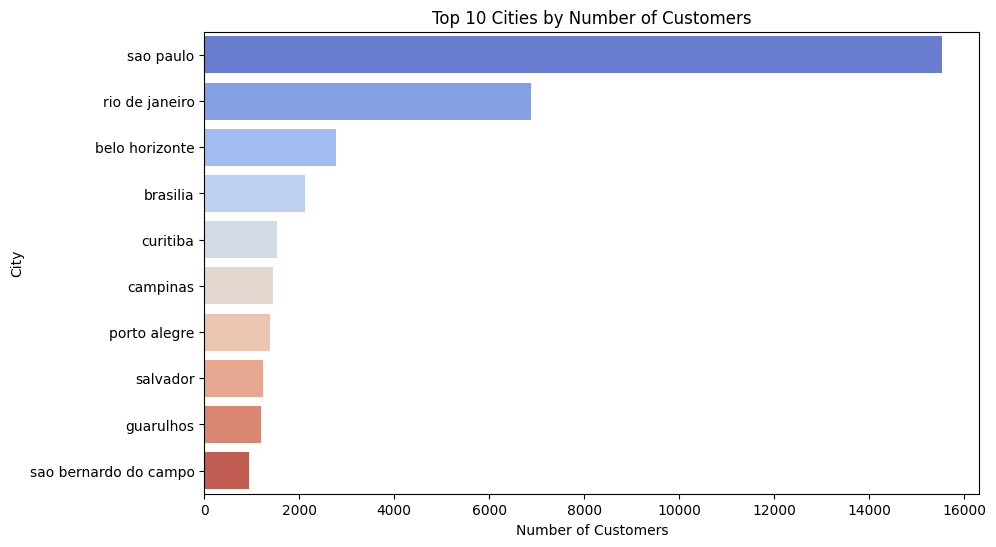

In [25]:
# Hitung jumlah unik customer di setiap kota
city_customer_count = customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

# Buat DataFrame baru untuk visualisasi
df_visual = pd.DataFrame(city_customer_count).reset_index()
df_visual.columns = ['City', 'Number of Customers']

# Buat plot
plt.figure(figsize=(10,6))
sns.barplot(x='Number of Customers', y='City', data=df_visual.head(10), palette='coolwarm')

# Tampilkan plot
plt.title('Top 10 Cities by Number of Customers')
plt.show()


### Pertanyaan 2:

In [26]:
# Hitung rata-rata review_score
average_review_score = review_df['review_score'].mean()

print(f"Rata-rata skala skor ulasan adalah {average_review_score:.2f}")

Rata-rata skala skor ulasan adalah 4.09


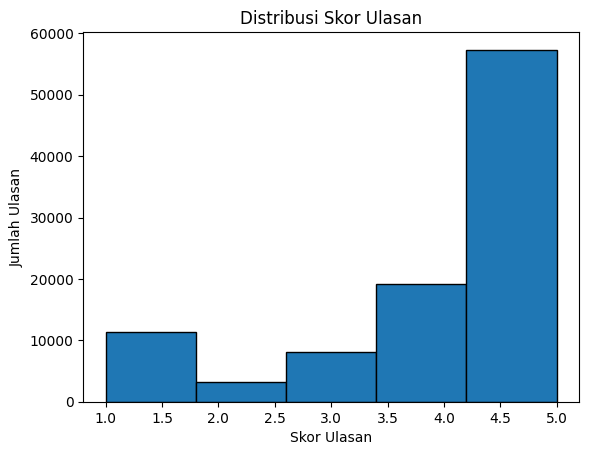

In [27]:
# Buat histogram
plt.hist(review_df['review_score'], bins=5, edgecolor='black')

# Tambahkan judul dan label
plt.title('Distribusi Skor Ulasan')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah Ulasan')

# Tampilkan plot
plt.show()

### Pertanyaan 3

In [28]:
# Hitung rata-rata delivery date

average_delivery_time = abs(order_df['delivery_time'].mean())
print(f"Rata-rata waktu pengiriman adalah {average_delivery_time:.2f} hari")


Rata-rata waktu pengiriman adalah 9.88 hari


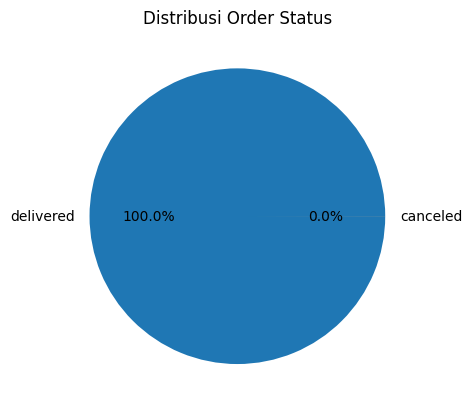

In [33]:
# Hitung jumlah pesanan untuk setiap status
order_status_counts = order_df["order_status"].value_counts()

# Buat pie chart
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%')
plt.title("Distribusi Order Status")
plt.show()

## Conclusion

- Kota dengan jumlah customer terbanyak adalah Sao Paulo. Berikut ini rincian kota dengan jumlah customer terbanyak 🇰

1. Sao Paulo
2. Rio DeJaniero
3. Belo Horizonte
4. Brasilia
5. Curitiba
6. Campinas
7. Porto Alegre
8. Salvador
9. Guarulhos
10. Sao Bernardo Do Compo

- Rata-rata skala skor ulasan (Review) satisfaction pelanggan dari produk yang dijual adalah 4.09

- Rata-rata waktu pengiriman barang adalah 9.88 hari

### Gabungkan data CSV

In [ ]:
# Baca ketiga file CSV
customer_df = pd.read_csv('customer.csv')
review_df = pd.read_csv('review.csv')
order_df = pd.read_csv('order.csv')

# Gabungkan ketiga DataFrame menjadi satu
merged_df = pd.concat([customer_df, review_df, order_df], ignore_index=True)

# Simpan DataFrame yang digabungkan ke dalam satu file CSV
merged_df.to_csv('merged_file.csv', index=False)

